In [1]:
from random import random, randint, uniform
import matplotlib.pyplot as plt
import numpy as np

## macrolensing ##
κ = 0.05 # convergence
γ1 = 0.1 # real shear
γ2 = 0 # imaginary shear

## photon field of view ##
L = 8 # image plane width 
Nray = 10**6 # number of photons in the image plane 

## resolution ##
px = 1/72 # the width of a pixel
print('# of pixels in a given image plane size')
N_px = L**2 / px**2
print(N_px)
print('# of photons per pixel')
photons_per_px = Nray/N_px
print(photons_per_px)

# of pixels in a given image plane size
331776.0
# of photons per pixel
3.014081790123457


In [2]:
## mapping image position to source position ##

# lens: point-mass stars
def βx(x, y):
    sumx = 0
    for i in range(Nstar):
        sumx += mstar * (x-xstar[i]) / ((x-xstar[i])**2 + (y-ystar[i])**2) 
    return (1-κ-γ1)*x - γ2*y - sumx

def βy(x, y):
    sumy = 0
    for i in range(Nstar):
        sumy += mstar * (y-ystar[i]) / ((x-xstar[i])**2 + (y-ystar[i])**2) 
    return -γ2*x + (1-κ+γ1)*y - sumy

# lens: point-mass stars + microhalos
def βx_halo(x, y):
    sumx = 0
    for i in range(Nstar):
        sumx += mstar * (x-xstar[i]) / ((x-xstar[i])**2 + (y-ystar[i])**2) 
    for i in range(Nhalo):
        sumx += mhalo * (x-xhalo[i]) / ((x-xhalo[i])**2 + (y-yhalo[i])**2 + ahalo**2) - (mhalo * (x-xhalo[i]) / ((x-xhalo[i])**2 + (y-yhalo[i])**2 + (2*ahalo)**2))
    return (1-κ-γ1)*x - γ2*y - sumx

def βy_halo(x, y):
    sumy = 0
    for i in range(Nstar):
        sumy += mstar * (y-ystar[i]) / ((x-xstar[i])**2 + (y-ystar[i])**2) 
    for i in range(Nhalo):
        sumy += mhalo * (y-yhalo[i]) / ((x-xhalo[i])**2 + (y-yhalo[i])**2 + ahalo**2) - (mhalo * (y-yhalo[i]) / ((x-xhalo[i])**2 + (y-yhalo[i])**2 + (2*ahalo)**2))
    return -γ2*x + (1-κ+γ1)*y - sumy

In [39]:
## properties of lenses ##

Nstar = 2 # number of stars
mstar = 1 # mass of each star
xstar = [-1,1] # x position of each star
ystar = [0,0] # y position of each star

Nhalo = 10 # number of halos
mhalo = 0.1 # mass of halo 
ahalo = 0.1 # size of halo

L_lens = 4 # lens position will be within L_lens x L_lens window

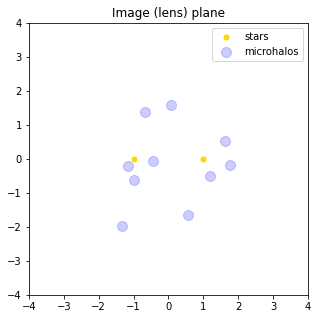

In [41]:
## microhalo position ###
xhalo = np.random.uniform(-L_lens/2, L_lens/2, Nhalo)
yhalo = np.random.uniform(-L_lens/2, L_lens/2, Nhalo)

## lens positions on image plane ##
plt.subplots(figsize=(5,5))
plt.plot(xstar, ystar, '.', color='gold', markersize=10, label='stars')
plt.plot(xhalo, yhalo, 'b.', markersize=20, alpha=0.2, label='microhalos')
plt.title('Image (lens) plane')
plt.xlim(-L/2, L/2)
plt.ylim(-L/2, L/2)
plt.legend()
plt.show()

In [13]:
## generate homogenous photon positions on image plane ##

xp = []
yp = []
for i in range(Nray):
    xp.append(random()*L - L/2)
    yp.append(random()*L - L/2)

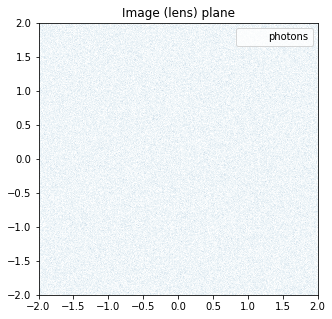

In [50]:
## photon positions on image plane ##
plt.subplots(figsize=(5,5))
plt.plot(xp, yp, '.', markersize=0.015, label='photons')
plt.title('Image (lens) plane')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend(loc=1)
plt.show()

In [42]:
# map photon positions on image plane to source plane 

bx = []
by = []
bx_halo = []
by_halo = []

import time
print(time.strftime("%H:%M:%S", time.localtime()))

for i in range(Nray):
    # without microhalos
    bx.append(βx(xp[i], yp[i]))
    by.append(βy(xp[i], yp[i]))
    # with microhalos
    bx_halo.append(βx_halo(xp[i], yp[i]))
    by_halo.append(βy_halo(xp[i], yp[i]))
    
import time
print(time.strftime("%H:%M:%S", time.localtime()))

19:55:06
19:56:01


### Microlensing Magnification Maps 

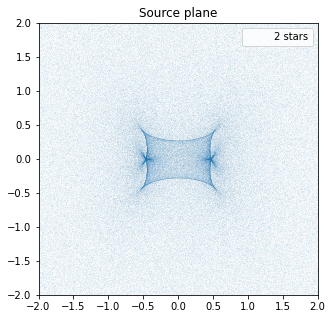

In [56]:
## magnification map without microhalos ##
import matplotlib.pyplot as plt

plt.subplots(figsize=(5,5))
plt.plot(bx, by, '.', markersize=0.015, label='{} stars'.format(Nstar))
plt.title('Source plane')
plt.xlim(-L_lens/2, L_lens/2)
plt.ylim(-L_lens/2, L_lens/2)
plt.legend(loc=1)
plt.show()

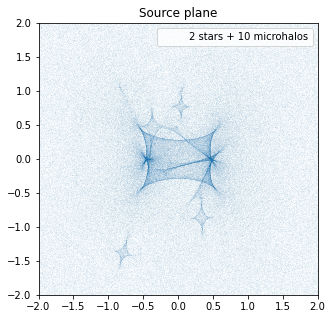

In [57]:
## magnification map including microhalos ##
import matplotlib.pyplot as plt

plt.subplots(figsize=(5,5))
plt.plot(bx_halo, by_halo, '.', markersize=0.015, label='{} stars + {} microhalos'.format(Nstar, Nhalo))
plt.title('Source plane')
plt.xlim(-L_lens/2, L_lens/2)
plt.ylim(-L_lens/2, L_lens/2)
plt.legend(loc=1)
plt.show()

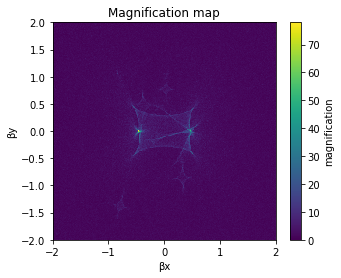

In [64]:
## 2D histogram of the magnificaton map ##

# where bin size = pixel size 
nbins = int(L/px) # number of pixels on sidelength of image plane

H, xedges, yedges = np.histogram2d(bx_halo, by_halo, bins=nbins, range=((-L/2, L/2),(-L/2, L/2)))

# H is the photon count in each pixel 
# needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)

# normalize magnification
photons_per_px = Nray/N_px
norm = H / photons_per_px

# mask pixels with a value of zero
masked = np.ma.masked_where(norm==0,norm) 
 
# plot 2D histogram using pcolor
fig = plt.figure(figsize=(5,4))
plt.pcolormesh(xedges, yedges, norm)
plt.xlabel('βx')
plt.ylabel('βy')
plt.title('Magnification map')
plt.xlim(-L_lens/2, L_lens/2)
plt.ylim(-L_lens/2, L_lens/2)
cbar = plt.colorbar()
cbar.ax.set_ylabel('magnification')
plt.savefig('Magnification Map.pdf')

### Magnification Curve of a Finite Source 

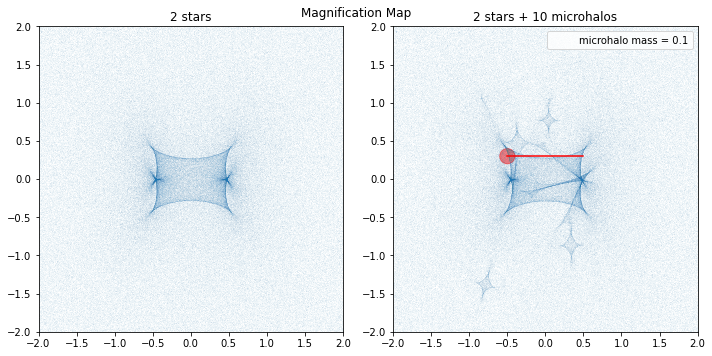

In [66]:
## draw horizontal trajectory of the source ##

import math
import numpy as np
import matplotlib.pyplot as plt

r = 0.1 # radius of the source 

# start and end point of trajectory on source plane 
x1, y1 = -0.5, 0.3
x2, y2 = 0.5, 0.3

plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(bx, by, '.', markersize=0.015)
plt.title('{} stars'.format(Nstar))
plt.xlim(-L_lens/2, L_lens/2)
plt.ylim(-L_lens/2, L_lens/2)

plt.subplot(1, 2, 2)
plt.plot(bx_halo, by_halo, '.', markersize=0.015, label='microhalo mass = {}'.format(mhalo))
plt.plot((x1,x2), (y1,y2), 'r-')
source = plt.Circle((x1, y1), r, color='r', alpha=0.5)
plt.gca().add_patch(source)
plt.title('{} stars + {} microhalos'.format(Nstar, Nhalo))
plt.xlim(-L_lens/2, L_lens/2)
plt.ylim(-L_lens/2, L_lens/2)
plt.legend(loc=1)

plt.tight_layout()
plt.suptitle('Magnification Map')
plt.show()

In [70]:
## compute Magnification CURVE ##

import math
import numpy as np

print('trajectory: ({},{}) to ({},{})'.format(x1,y1,x2,y2))

# x and y points of trajectory on source plane 
freq = 500 # how frequent the points are sampled
xt = np.linspace(x1, x2, freq) 
yt = np.linspace(y1, y2, freq)

# all beta points to check 
beta = np.column_stack((bx, by))
beta_halo = np.column_stack((bx_halo, by_halo))

b_cut = []
bhalo_cut = []

print('x range:', x1-r, x2+r)
print('y range:', y1-r, y2+r)
print()

# cut out points that are far from the trajectory
for x, y in beta:
    if x1-r <= x <= x2+r and y1-r <= y <= y2+r:
        b_cut.append([x,y])
print('no DM halo:', len(b_cut))
for x, y in beta_halo:
    if x1-r <= x <= x2+r and y1-r <= y <= y2+r:
        bhalo_cut.append([x,y])
print('with DM halo:', len(bhalo_cut))
print()

import time
print(time.strftime("%H:%M:%S", time.localtime()))

mag = []
mag_halo = []

# check if beta point is inside the circle 
for i in np.arange(freq):
    count = 0 # count number of photons inside the circle along the trajectory
    for bxi, byi in b_cut:
        if math.sqrt((bxi-xt[i])**2+(byi-yt[i])**2) <= r: 
            count += 1
    mag.append(count)
    
    count = 0
    for bxi, byi in bhalo_cut:
        if math.sqrt((bxi-xt[i])**2+(byi-yt[i])**2) <= r: 
            count += 1
    mag_halo.append(count)


import time
print(time.strftime("%H:%M:%S", time.localtime()))

trajectory: (-0.5,0.3) to (0.5,0.3)
x range: -0.6 0.6
y range: 0.19999999999999998 0.4

no DM halo: 18260
with DM halo: 18054

20:21:32
20:21:49


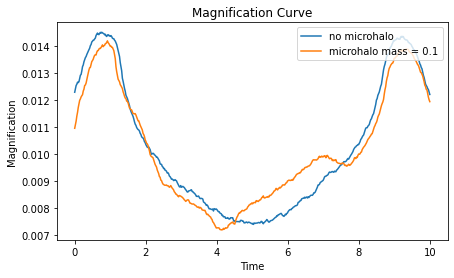

In [74]:
## graphing magnification curve ##
time = np.linspace(0, 10, freq) 

# normalized magnification = (count/(pi*r**2)) / (Nray/L**2)
mag = (np.array(mag) /(np.pi* r**2)) / (Nray/L**2)
mag_halo = (np.array(mag_halo) /(np.pi* r**2)) / (Nray/L**2)

plt.figure(figsize=(7,4))
plt.plot(time, mag, label='no microhalo')
plt.plot(time, mag_halo, label='microhalo mass = {}'.format(mhalo))
plt.title('Magnification Curve')
plt.xlabel('Time')
plt.ylabel('Magnification')
plt.legend(loc=1)
#plt.savefig('curve plot L{}'.format(DM_realization))
plt.show()

### Power Spectral Density of the Magnification Curve

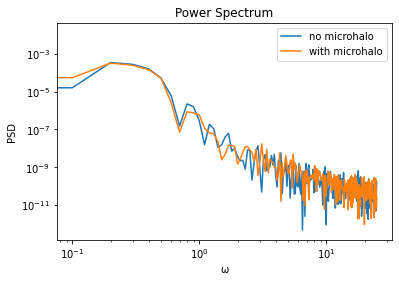

In [76]:
## calcualte PSD of the magnificaiton curve ##

# apply Tukey Window to taper the edge of the magnification curve
from scipy import signal
window = signal.windows.tukey(freq, alpha=0.3)

from astroML.fourier import PSD_continuous
import matplotlib.pyplot as plt
time = np.linspace(0, 10, freq)  

f, PSD = PSD_continuous(time, mag*window)
_, PSDh = PSD_continuous(time, mag_halo*window)

plt.loglog(f, PSD, label = 'no microhalo')
plt.loglog(f, PSDh, label = 'with microhalo')
plt.title('Power Spectrum')
plt.ylabel('PSD')
plt.xlabel('ω')
plt.legend()
plt.show()

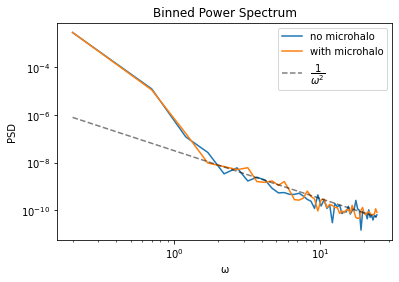

In [84]:
# smoothing via frequency binning method with bin size = 5
PSD2 = np.mean(np.reshape(PSD[:-1],(50,5)), axis = 1)
PSDh2 = np.mean(np.reshape(PSDh[:-1],(50,5)), axis = 1)
f2 = np.mean(np.reshape(f[:-1],(50,5)), axis = 1)

plt.loglog(f2, PSD2, label='no microhalo')
plt.loglog(f2, PSDh2, label='with microhalo')
spectra = -2
plt.loglog(f2, 10**-7.5*f2**spectra, 'k--', alpha=0.5, label = r'$\dfrac{1}{ω^{2}}$')
plt.title('Binned Power Spectrum')
plt.ylabel('PSD')
plt.xlabel('ω')
plt.legend()
plt.show()